# Multiple Linear Regression

# Static Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [2]:
# load the boston dataset
boston = datasets.load_boston(return_X_y=False)

# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target

In [3]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [4]:
# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print("Coefficients: \n", reg.coef_)

# variance score: 1 means perfect prediction
print("Variance score: {}".format(reg.score(X_test, y_test)))

Coefficients: 
 [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.720905667266178


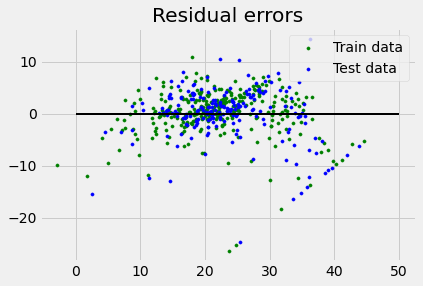

In [5]:
# plot for residual error

## setting plot style
plt.style.use("fivethirtyeight")

## plotting residual errors in training data
plt.scatter(
    reg.predict(X_train),
    reg.predict(X_train) - y_train,
    color="green",
    s=10,
    label="Train data",
)

## plotting residual errors in test data
plt.scatter(
    reg.predict(X_test),
    reg.predict(X_test) - y_test,
    color="blue",
    s=10,
    label="Test data",
)

## plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

## plotting legend
plt.legend(loc="upper right")

## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

# Example 1

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Read the data

In [3]:
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Multiple Linear Regression

# Modelling

Just like for simple linear regression, we will define our features and target variable and use scikit-learn library to perform linear regression.

In [4]:
Xs = data.drop(["sales", "Unnamed: 0"], axis=1)


y = data["sales"].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(Xs, y)
print(
    "The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(
        reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]
    )
)

The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


# Assessing the relevancy of the model

In [5]:
X = np.column_stack((data["TV"], data["radio"], data["newspaper"]))
y = data["sales"]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 14 May 2020   Prob (F-statistic):           1.58e-96
Time:                        07:19:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

# Example 2

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [11]:
dataset = pd.read_csv("winequality.csv")

In [12]:
dataset.shape

(1599, 12)

In [13]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [15]:
dataset = dataset.fillna(method="ffill")

In [16]:
X = dataset[
    [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol",
    ]
].values
y = dataset["quality"].values

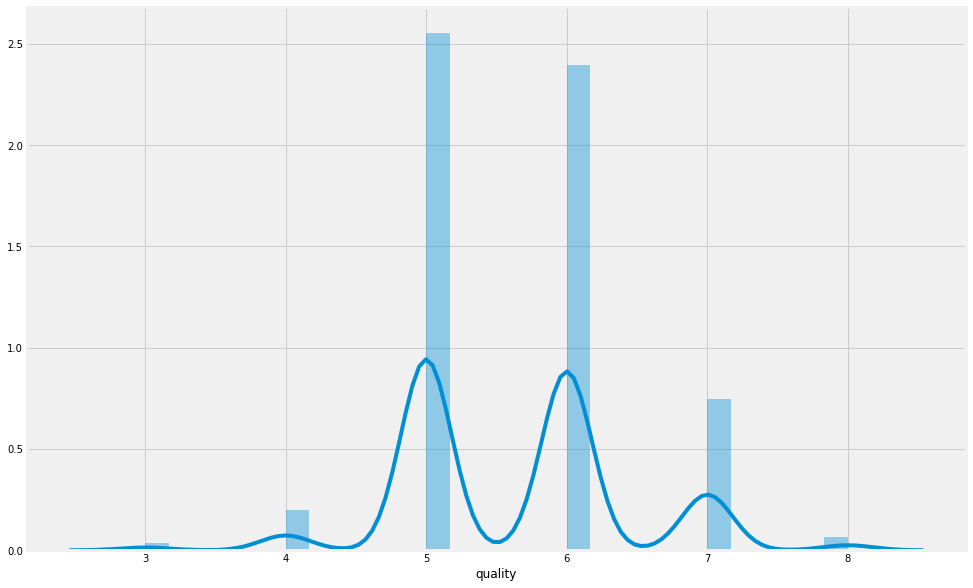

In [17]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
seabornInstance.distplot(dataset["quality"])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
coeff_df = pd.DataFrame(regressor.coef_, columns=["Coefficient"])
coeff_df

,Coefficient
0,0.041284
1,-1.149528
2,-0.177927
3,0.027870
4,-1.873407
5,0.002684
6,-0.002777
7,-31.516666
8,-0.254486
9,0.924040


In [35]:
y_pred = regressor.predict(X_test)

In [39]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


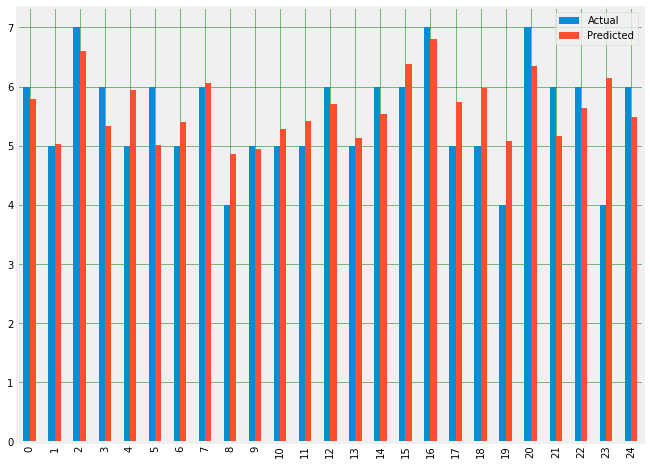

In [40]:
df1.plot(kind="bar", figsize=(10, 8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

In [41]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4696330928661114
Mean Squared Error: 0.38447119782012484
Root Mean Squared Error: 0.6200574149384271
